In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/panel_data.csv')
data.head()

,time,state,t2m,tp,lai_hv,lai_lv,cases,deaths
0,2020-01-01,TIBESTI,13.226863,0.006183,0.010336,0.264653,15.0,0.0
1,2020-01-01,BORKOU,17.938311,0.001743,0.013868,0.356516,80.0,0.0
2,2020-01-01,ENNEDI OUEST,14.834963,0.001229,0.053228,0.344716,58.0,0.0
3,2020-01-01,WADI FIRA,18.471732,0.001052,0.268617,0.859191,600.0,0.0
4,2020-01-01,SALAMAT,25.261679,0.001052,0.567471,1.311763,621.0,3.0


In [2]:
# Assuming 'data' is a pandas DataFrame and 'time' contains 'YYYY-MM' formatted strings
years = [int(element.split('-')[0]) for element in data['time']]
months = [int(element.split('-')[1]) for element in data['time']]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the index to datetime format
data.index = pd.to_datetime({'year': years, 'month': months, 'day': 1})

def plot_data_for_a_state(state, data, ax):
    data_state = data.loc[data['state'] == state]
    ax.set_title(state)
    # Plot the first time series 't2m' on ax1
    ax.plot(data_state.index, data_state['t2m'], marker='*', color='black', label='Temperature')
    # ax.plot(data_state.index, data_state['cases'], marker='*', label='Malaria cases')
    ax.plot(data_state.index, data_state['deaths'], marker='*',color='red', label='Deaths')
    ax.plot(data_state.index, data_state['tp'], marker='*', color='green', label='Precipitation')
    ax.set_xlabel('Time')
    ax.set_ylabel('')  # Y-axis label for 't2m'
    ax.tick_params(axis='y', labelcolor='black')  # Set tick color to match the line
    # ax.set_yscale('log')
    ax2 = ax.twinx()  # Create a twin axis sharing the same x-axis
    ax2.plot(data_state.index, data_state['cases'], marker='*', color='orange', label='Malaria cases')
    ax2.set_ylabel('', color='orange')  # Y-axis label for 'tp'
    ax2.tick_params(axis='y', labelcolor='orange')  # Set tick color to match the line
    ax2.set_ylabel('Malaria cases')
    ax.grid(True)
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))


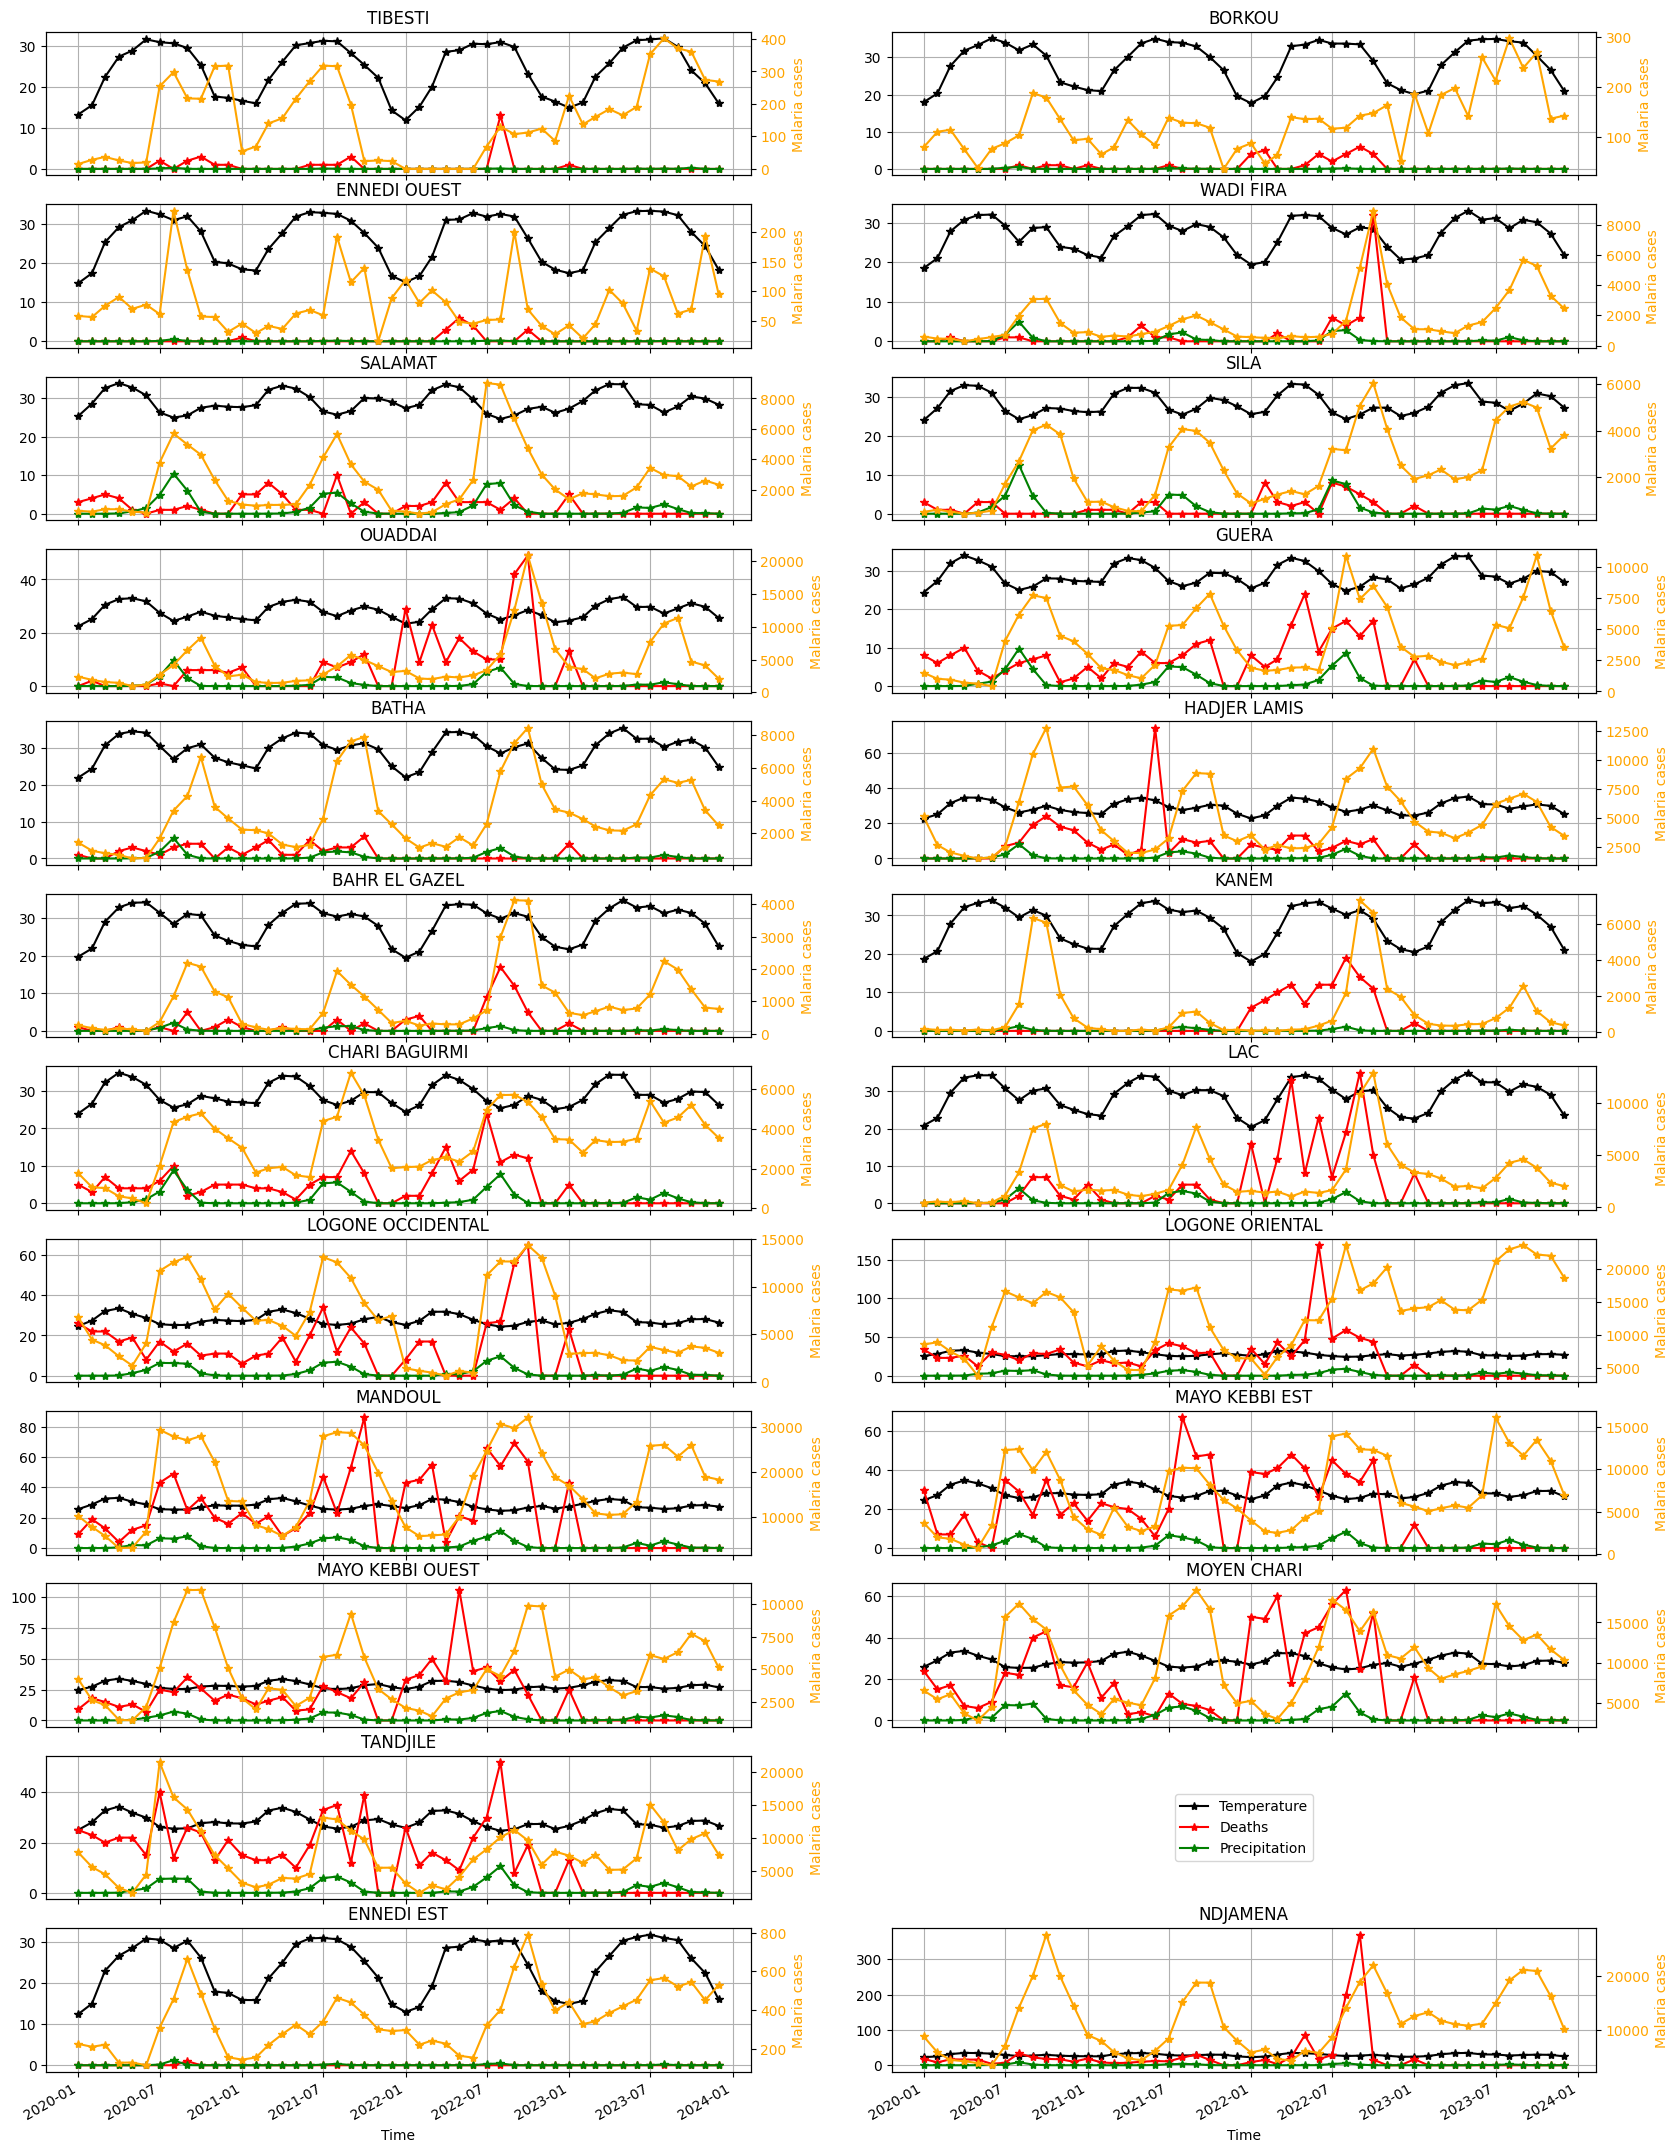

In [4]:
fig, axes = plt.subplots(12,2, figsize=(20,30))
states = data['state'].unique().tolist() + ['NDJAMENA']
states[21] = ''
for i in range(len(states)):
    if (i+1)%2 == 1:
        ax = axes[i//2,0]
        plot_data_for_a_state(states[i], data, ax)
    else:
        ax = axes[i//2,1]
        if states[i] != '':
            plot_data_for_a_state(states[i], data, ax)
    # ax.set_yscale('log')
            
axes[10, 1].clear()
axes[10, 1].axis('off')
handles, labels = axes[0, 0].get_legend_handles_labels()  # Get handles and labels from the first subplot
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.5), bbox_transform=axes[10, 1].transAxes)

fig.autofmt_xdate() 
plt.savefig('../docs/time-series-plots.png', format='png', bbox_inches='tight', pad_inches=0.1)

plt.show()

In [5]:
data.describe()

,t2m,tp,lai_hv,lai_lv,cases,deaths
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,28.086410,0.942788,0.904950,1.193566,4745.457428,8.137681
std,4.162898,1.971295,0.733963,0.560551,5645.467476,18.745010
min,11.831200,0.000322,0.001781,0.264649,0.000000,0.000000
25%,25.873371,0.000975,0.053228,0.718543,600.000000,0.000000
50%,28.178144,0.024345,0.748968,1.278340,2777.500000,0.000000
75%,31.195747,0.703129,1.466040,1.545302,6443.750000,10.000000
max,35.450864,12.988431,2.477620,2.385763,32091.000000,370.000000


In [6]:
data.loc[data['deaths'] == 370]

,time,state,t2m,tp,lai_hv,lai_lv,cases,deaths
2022-09-01,2022-09-01,NDJAMENA,27.221582,1.766327,2.469971,1.728719,18909.0,370.0


In [7]:
national_data = data[['time','t2m','tp','cases','deaths']]
national_data = national_data.groupby(by='time').mean().reset_index()
years = [int(element.split('-')[0]) for element in national_data['time']]
months = [int(element.split('-')[1]) for element in national_data['time']]
national_data.index = pd.to_datetime({'year': years, 'month': months, 'day': 1})

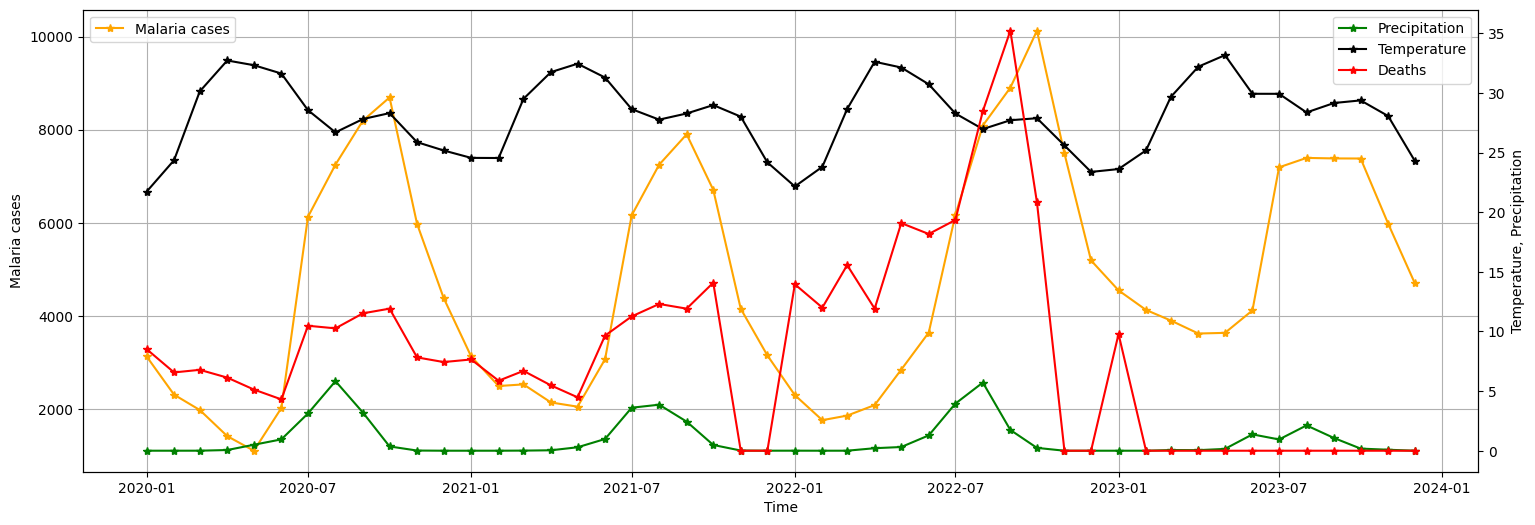

In [9]:
fig, ax = plt.subplots(1, figsize=(18,6))
# ax.plot(national_data.index, national_data['t2m'], marker='*',color='black', label='Temperature')
ax.plot(national_data.index, national_data['cases'], marker='*',color='orange', label='Malaria cases')
ax.set_xlabel('Time')
ax.set_ylabel('')  # Y-axis label for 't2m'
ax.tick_params(axis='y', labelcolor='black')  # Set tick color to match the line
ax.set_ylabel('Malaria cases')
# ax.set_yscale('log')
ax2 = ax.twinx()  # Create a twin axis sharing the same x-axis
ax2.plot(national_data.index, national_data['tp'], marker='*', color='green', label='Precipitation')
ax2.plot(national_data.index, national_data['t2m'], marker='*', color='black', label='Temperature')
ax2.plot(national_data.index, national_data['deaths'], marker='*', color='red', label='Deaths')
# ax2.set_ylabel('', color='g')  # Y-axis label for 'tp'
ax2.tick_params(axis='y')  # Set tick color to match the line
ax2.set_ylabel('Temperature, Precipitation')
ax.grid(True)
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.legend(loc='best')
ax.legend(loc='upper left')
plt.savefig('../docs/cases-vs-precip-and-temp.png', format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [125]:
import geopandas as gpd

data_map = gpd.read_file('../data/preprocessed_data/2020-08-01.geojson')

In [126]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


def display_in_map(data, column):
    fig, ax = plt.subplots(1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    data.plot(edgecolor='none', ax=ax, column=column, cmap='coolwarm', legend=False) #, vmin=0, vmax=10_000)
    plt.legend('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    

2020-01-01


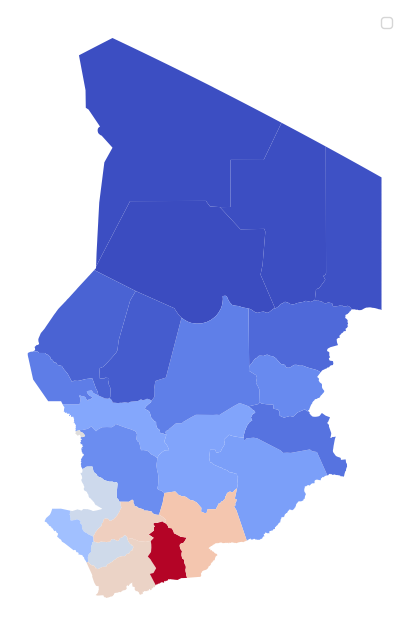

In [130]:
display_in_map(data_map, 'cases')
plt.axis('off')
plt.savefig('t2m-2020-01-01.png', format='png', bbox_inches='tight', pad_inches=0, dpi=50)
plt.show()

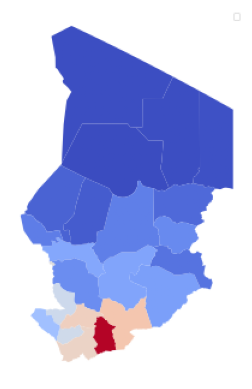

In [143]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image
image = mpimg.imread('t2m-2020-01-01.png')

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

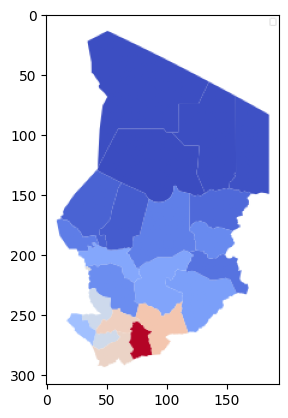

In [148]:
plt.imshow(image[:,:,:3])

(np.float64(-0.5), np.float64(193.5), np.float64(307.5), np.float64(-0.5))

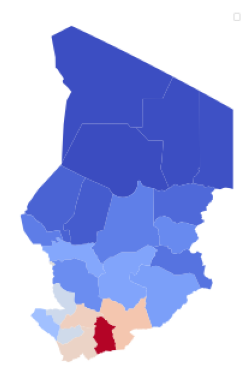

In [141]:
from PIL import Image

# Load image with PIL
pil_image = Image.open('t2m-2020-01-01.png').convert('RGB')  # Convert directly to greyscale

# Convert to numpy array if needed
greyscale_image = np.array(pil_image)
plt.imshow(greyscale_image)
plt.axis('off')

In [142]:
greyscale_image.shape

(308, 194, 3)

In [115]:
from skimage.color import rgb2gray
image2 = rgb2gray(image)  # Convert to 2D (height, width)

ModuleNotFoundError: No module named 'skimage'

In [114]:
image.shape

(184, 116, 4)

(np.float64(-0.5), np.float64(388.5), np.float64(615.5), np.float64(-0.5))

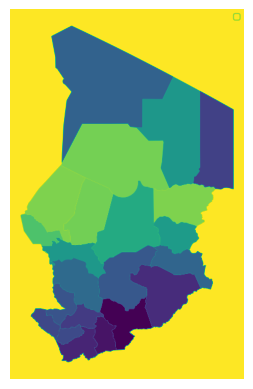

In [89]:
import numpy as np
img2 = np.mean(image[:,:,:3], axis=2)
plt.imshow(img2)
plt.axis('off')

In [83]:
image.shape

(616, 389, 4)

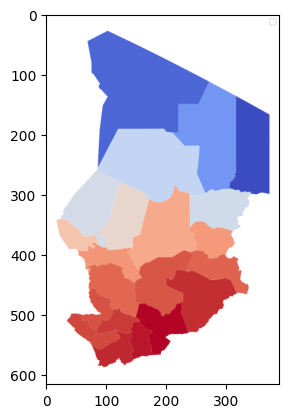

In [61]:
plt.imshow(image[:,:,:3])